# Space X Plotly Dashboard

---
## Import the libraries and dataset

In [7]:
# importing the libraries
import pandas as pd
import numpy as np
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import Dash,dcc,html,Input,Output

In [2]:
# import the dataset
df = pd.read_csv('spacex_launch_dash.csv',index_col=0)
df.head()

,Flight Number,Launch Site,Mission Outcome,class,Payload Mass (kg),Booster Version,Booster Version Category
0,1,CCAFS LC-40,Success,0,0.0,F9 v1.0 B0003,v1.0
1,2,CCAFS LC-40,Success,0,0.0,F9 v1.0 B0004,v1.0
2,3,CCAFS LC-40,Success,0,525.0,F9 v1.0 B0005,v1.0
3,4,CCAFS LC-40,Success,0,500.0,F9 v1.0 B0006,v1.0
4,5,CCAFS LC-40,Success,0,677.0,F9 v1.0 B0007,v1.0


In [3]:
# Array of site names for easy reference
site_names = df['Launch Site'].unique()
site_names = np.append(site_names,'ALL') # Add ALL sites for dropdown menu
print(site_names)

['CCAFS LC-40' 'VAFB SLC-4E' 'KSC LC-39A' 'CCAFS SLC-40' 'ALL']


---

## Data Exploration

### Pie Chart
Create a pie chart displaying the total number of successful launches by site

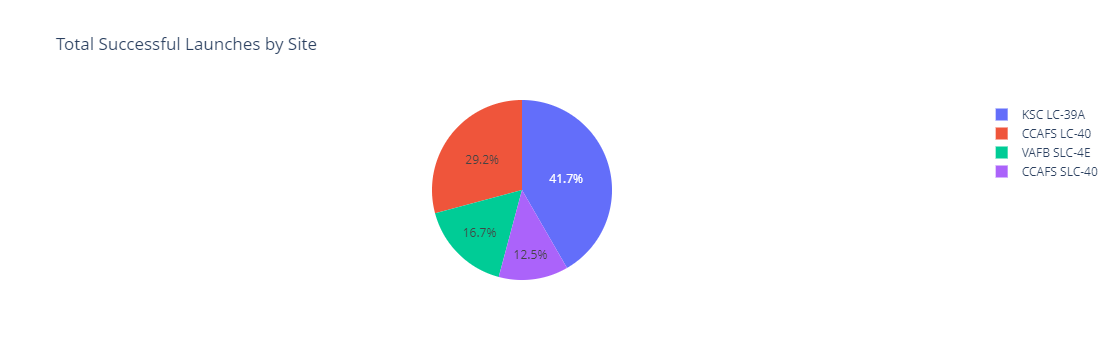

In [41]:
# Create pie chart
df_pie = df.copy()
fig_pie = px.pie(df_pie,values='class',names='Launch Site',
                 title='Total Successful Launches by Site')
fig_pie.show()

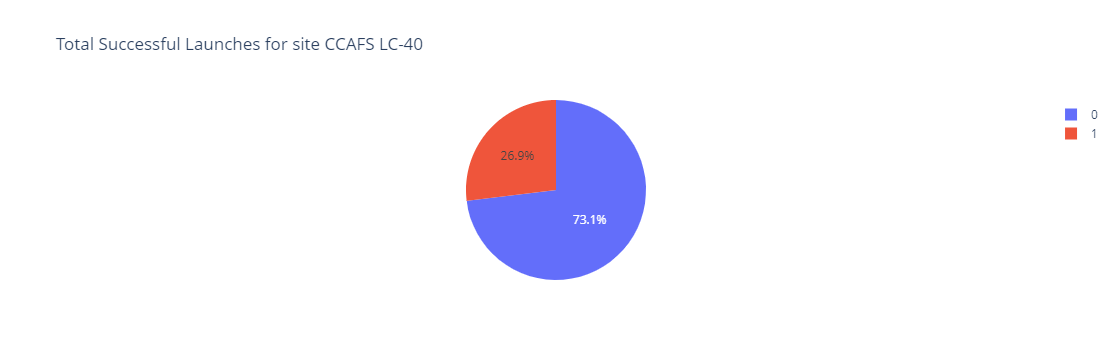

In [56]:
entered_site = 'CCAFS LC-40'
df_pie=df.query("`Launch Site` == '{}'".format(entered_site))
fig_pie = px.pie(df_pie, names='class', 
                title='Total Successful Launches for site {}'.format(entered_site))
fig_pie.show()
#df_pie

### Scatter Plot

In [72]:
# Filter dataframe through payload range
val = [0,5000]
df[df['Payload Mass (kg)'].apply(lambda x: x in range(val[0],val[1]))] 

,Flight Number,Launch Site,Mission Outcome,class,Payload Mass (kg),Booster Version,Booster Version Category
0,1,CCAFS LC-40,Success,0,0.0,F9 v1.0 B0003,v1.0
1,2,CCAFS LC-40,Success,0,0.0,F9 v1.0 B0004,v1.0
2,3,CCAFS LC-40,Success,0,525.0,F9 v1.0 B0005,v1.0
3,4,CCAFS LC-40,Success,0,500.0,F9 v1.0 B0006,v1.0
4,5,CCAFS LC-40,Success,0,677.0,F9 v1.0 B0007,v1.0
5,7,CCAFS LC-40,Success,0,3170.0,F9 v1.1,v1.1
6,8,CCAFS LC-40,Success,0,3325.0,F9 v1.1,v1.1
7,9,CCAFS LC-40,Success,0,2296.0,F9 v1.1,v1.1
8,10,CCAFS LC-40,Success,0,1316.0,F9 v1.1,v1.1
9,11,CCAFS LC-40,Success,0,4535.0,F9 v1.1,v1.1


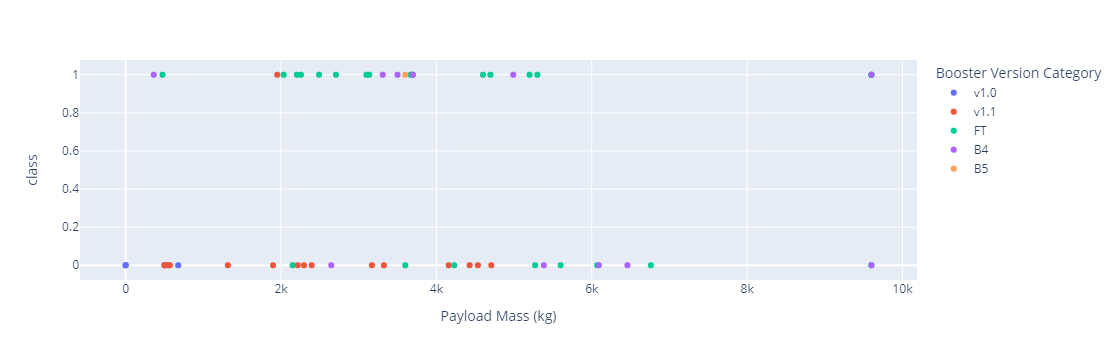

In [10]:
fig_scatter = px.scatter(df, x='Payload Mass (kg)',y='class',color='Booster Version Category')
fig_scatter.show()

---
## Dashboard

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import Dash,dcc,html,Input,Output

# import the dataset
df = pd.read_csv('spacex_launch_dash.csv',index_col=0)
df.head()

# Array of site names for easy reference
site_names = df['Launch Site'].unique()
site_names = np.append(site_names,'ALL') # Add ALL sites for dropdown menu

# create the app
app = JupyterDash(__name__)

# define the html layout
app.layout = html.Div(children=[
    # Title for the page
    html.H1('Space X Launch Records Dashboard',style={'textAlign':'center','color':'#503D36','font-size':40}),
    html.Br(),
    # Drop down menu for launch site and pie chart
    html.Div([
        # Dropdown menu
        html.Div(dcc.Dropdown(id='site-dropdown',
                              options=[{'label':x,'value':x} for x in site_names],
                              value='ALL',
                              searchable=True,
                              )),
        # Pie chart
        html.Div(dcc.Graph(id='success-pie-chart'))
        
    ]),
    html.Br(),
    # Slider menu for payload range and scatter plot
    html.Div([
        # Slider menu
        html.Div(dcc.RangeSlider(id='payload-slider', # slider id
                                 min=0, max=10000,    # slider min/max value
                                 step=1000,           # slider increment
                                 value=[0,10000],    # default slider value
                                 marks={0:'0',
                                        2500:'2500',
                                        5000:'5000',
                                        7500:'7500',
                                       10000:'10000'}
                                )),
        # Scatter plot
        html.Div(dcc.Graph(id='success-payload-scatter-chart'))
    ])
])

# Appcallback
@app.callback([Output('success-pie-chart','figure'),
               Output('success-payload-scatter-chart','figure')],
              [Input('site-dropdown','value'),
               Input("payload-slider","value")]
             )

def get_pie_chart(entered_site,pload_val):
    
    if entered_site == 'ALL':
        # dataframe for pie chart
        df_pie = df.copy() 
        # dataframe for scatter plot for selected payload mass
        df_scat = df_pie[df_pie['Payload Mass (kg)'].apply(lambda x: x in range(pload_val[0],pload_val[1]))] 
        # pie chart for all sites
        fig_pie = px.pie(df_pie, values='class', 
                         names='Launch Site', 
                         title='Total Successful Launches by Site')
        # scatter plot for all sites
        fig_scatter = px.scatter(df_scat, x='Payload Mass (kg)',y='class',color='Booster Version Category')
    
    else:
        # dataframe for scatter plot for selected site
        df_pie = df.query("`Launch Site` == '{}'".format(entered_site)) # filter dataframe
        # dataframe for scatter plot for selected payload mass and site
        df_scat = df_pie[df_pie['Payload Mass (kg)'].apply(lambda x: x in range(pload_val[0],pload_val[1]))] 
        # plot the pie chart for the selected site
        fig_pie = px.pie(df_pie, names='class', 
                         title='Total Successful Launches for site {}'.format(entered_site))
        # plot the scatter plot for the selected site and payload range
        fig_scatter = px.scatter(df_scat, x='Payload Mass (kg)',y='class',color='Booster Version Category')
        
    return fig_pie, fig_scatter
        # return the outcomes piechart for a selected site

if __name__ == '__main__':
    app.run_server(mode='inline')

<font color='gold'> **Observations:**
<ol><font color='gold'>
    <li> The sites with the largest successful launches are </li>
<ol>
    <li>  KSC LC-39A 
    <li>  CCAFS LC-40 
    <li>  VAFC SLC-4E 
    <li>  CCAFS SLC-40
    </li>
    </ol>
    <li> The sites with the highest launch success rates are;</li>
<ol>
    <li>  KSC LC-39A   76.9%
    <li>  CCAFS LC-40  73.1%    
    <li>  VAFC SLC-4E  60.0%
    <li>  CCAFS SLC-40 57.1%
    </li>
    </ol>
    <li> The payload range that has the highest launch success rate is between the range of 2,000 and 4,000 kg</li>
    <li> The booster version with the highest launch success rate is the <strong>B5</strong> by default because it has only 1 data point at class 1, the next successful booster version would be the <strong>FT </strong>booster at 63.6% success rate.    